# Heart Disease Classification

This Project will be to predict weather or not some one has heart disease based on some key indicators of heart disease.




# Data

The source of this data set is https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease?resource=download.

## This data set includes the following features:

* HeartDisease(Target) : Y/N -> 1/0
* BMI : 0 -> 94.8
* Smoking : Y/N -> 1/0
* AlcoholDrinking(>14 for men or 7 for women drinks per week) : Y/N -> 1/0
* Stroke : Y/N -> 1/0
* PhysiclHealth(days in the last 30 days spent in poor physical health) : 1 ->30
* MentalHealth(days in the last 30 days spent in poor mental health) : 1 ->30
* DiffWalking(difficulty walking): Y/N -> 1/0
* Sex : Male/Female -> 1/0
* AgeCategory : (18-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,74-79,80 or older)
* Race : ('White', 'Black', 'Asian', 'American Indian/Alaskan Native', 'Hispanic', 'Other')
* Diabetic : (No, Borderline, Yes but pregnant, Yes)
* PhysicalActivity(reported physical activity in last 30 days) : Y/N -> 1/0
* GeneralHealth : ('Poor', 'Fair', 'Good', 'Very good', 'Excellent')
* SleepTime(Average hours of sleep) : 1 -> 24
* Asthma : Y/N -> 1/0
* KidneyDisease : Y/N -> 1/0
* SkinCancer : Y/N -> 1/0

# Dependencies

In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, plot_roc_curve
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.utils import shuffle

# Set plots to appear in notebook
%matplotlib inline

# Bring In Data

In [136]:
# bring in data set and save to pandas data frame df
df = pd.read_csv("DataSets\heart_2020_cleaned.csv")

In [137]:
# Make sure the shape is correct at 18 columns
df.shape

(319795, 18)

# Graph Data

In [138]:
# First 5 values
df.head()


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [139]:
#last 5 values
df.tail()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No
319794,No,46.56,No,No,No,0.0,0.0,No,Female,80 or older,Hispanic,No,Yes,Good,8.0,No,No,No


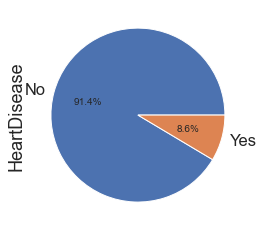

In [140]:
#Show target counts

df["HeartDisease"].value_counts().plot(kind="pie", autopct= '%1.1f%%');




* Since The Values are so unbalanced the model weights need to be adjusted

In [141]:
# get information on each coulumn and check for any missing values. 
#There should be no missing values because the dataset is clean.
df.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

# Comparing some values 

### plots using logarithmic scale for the y axis to show representations in the unbalanced data set

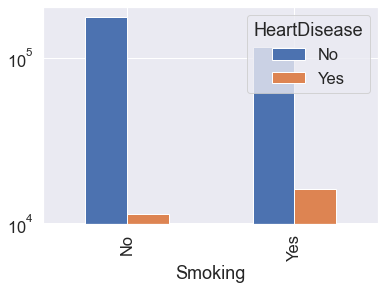

In [142]:
pd.crosstab(df.Smoking, df.HeartDisease).plot(kind='bar', logy = True);

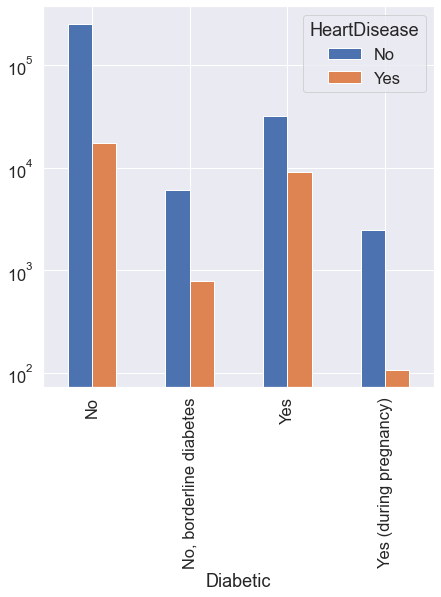

In [143]:
pd.crosstab(df.Diabetic, df.HeartDisease).plot(kind = 'bar', logy = True, figsize =(7 , 7));

# Convert all binary categorical columns to 1 or 0

In [144]:
# all yes no data collumns
ynDataCols=['HeartDisease','Smoking','AlcoholDrinking','Stroke', 'DiffWalking', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']

# convert all yes no collumns to 1 or 0 
for x in ynDataCols:
    df[x].replace(['Yes', "No"],[1,0], inplace=True)
    

# convert male female to 1 or 0
df['Sex'].replace(['Male', "Female"],[1,0], inplace=True)

## Corolation Matrix with all Yes/ No Values and Sex added in as Boolean


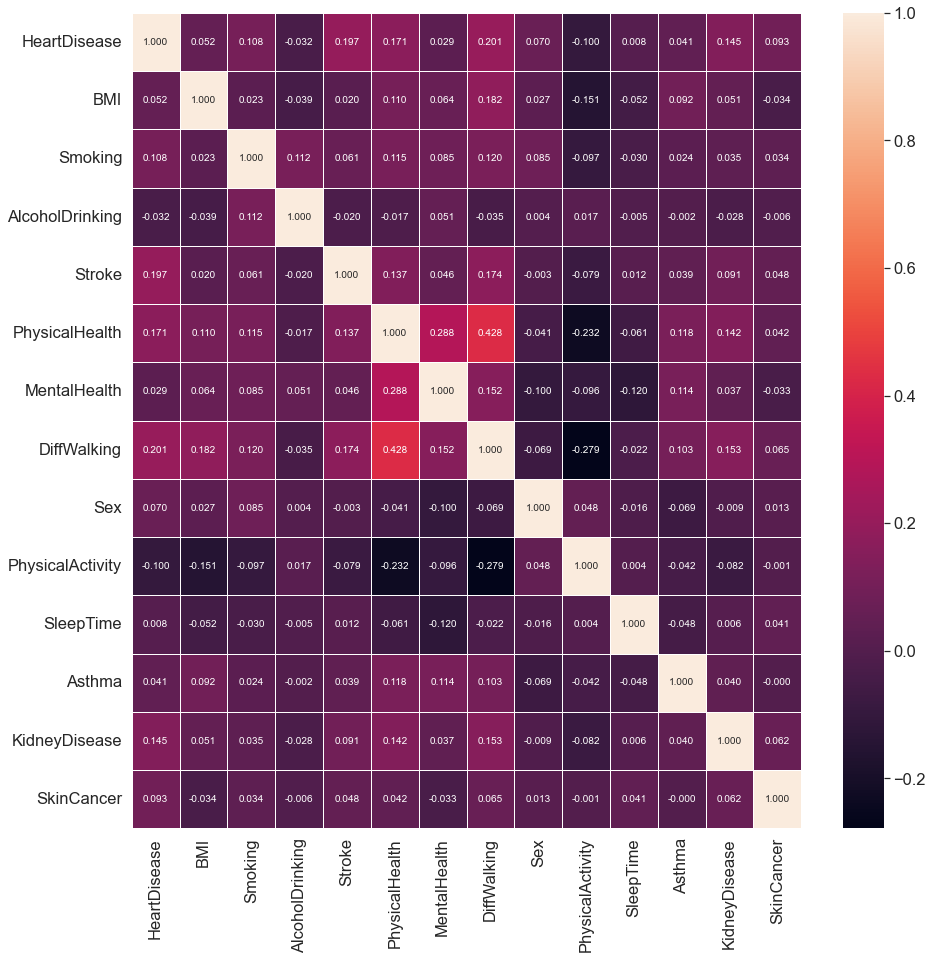

In [145]:
# set up corr matrix
corr_num_val = df.corr()
fix, ax = plt.subplots(figsize = (15,15))
ax = sns.heatmap(corr_num_val, annot = True, linewidths= .5, fmt=".3f", );


### Now that all of the binary categorical data is 0 or 1 Diff Walking is the highest individual correlation to heart disease; though Stroke and physicalActivity are not far behind.

#### Explore the realationship between physicalActivity value and heartDisease

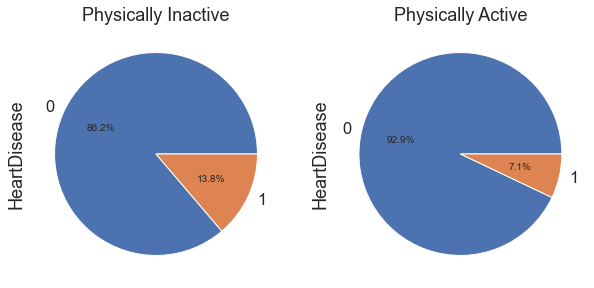

In [146]:
# set up 2 empty dataframes for physical Activity value
physicallyActive = pd.DataFrame()
physicallyInactive = pd.DataFrame()

#set dataframes equal to the 2 levels of physical activity
physicallyActive = df[df['PhysicalActivity'] == 1]
physicallyInactive = df[df['PhysicalActivity'] == 0]

#plot 2 sets side by side based on value counts of heart disease
fig, axes = plt.subplots(1,2)

physicallyInactive['HeartDisease'].value_counts().plot(kind = 'pie', ax=axes[0],figsize =(10,10), title="Physically Inactive", autopct= '%1.1f%%' );
physicallyActive['HeartDisease'].value_counts().plot(kind = 'pie', ax=axes[1], figsize =(10,10), title='Physically Active', autopct= '%1.1f%%');




##### The above pie charts show your twice as likely to have heart disease if you dont exerscise at least once every 30 days.

#### Explore the relationship between diffWalking and heartDisease values


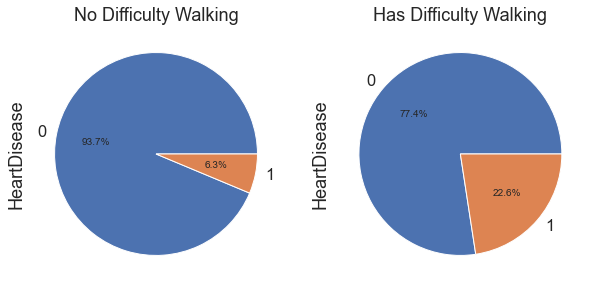

In [147]:
# set up 2 empty dataframes for Diff Walking values
yDiffWalking = pd.DataFrame()
nDiffWalking = pd.DataFrame()

#set dataframes equal to the 2 levels of Diff Walking value
yDiffWalking = df[df['DiffWalking'] == 1]
nDiffWalking = df[df['DiffWalking'] == 0]

#plot 2 sets side by side based on value counts of heart disease
fig, axes = plt.subplots(1,2)

nDiffWalking['HeartDisease'].value_counts().plot(kind = 'pie', ax=axes[0],figsize =(10,10), title="No Difficulty Walking", autopct= '%1.1f%%' );
yDiffWalking['HeartDisease'].value_counts().plot(kind = 'pie', ax=axes[1], figsize =(10,10), title='Has Difficulty Walking', autopct= '%1.1f%%');


#### The above pie charts show that you are almost 4 times more likely to have heart disease if you have dificulty walking

#### Explore the relationship between Stroke and heartDisease values


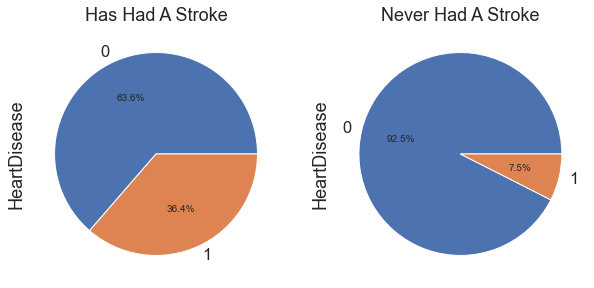

In [148]:
# set up 2 empty dataframes for physical Activity value
yStroke = pd.DataFrame()
nStroke = pd.DataFrame()

#set dataframes equal to the 2 levels of physical activity
yStroke = df[df['Stroke'] == 1]
nStroke = df[df['Stroke'] == 0]

#plot 2 sets side by side based on value counts of heart disease
fig, axes = plt.subplots(1,2)

yStroke['HeartDisease'].value_counts().plot(kind = 'pie', ax=axes[0],figsize =(10,10), title="Has Had A Stroke", autopct= '%1.1f%%' );
nStroke['HeartDisease'].value_counts().plot(kind = 'pie', ax=axes[1], figsize =(10,10), title='Never Had A Stroke', autopct= '%1.1f%%');




#### The above pie charts show that you are almost 5 times more likely to have heart disease if you have had a stroke.

# Pre Processing the rest of the categorical columns into one hot encoded columns

In [149]:
#split into x and y

X = df.drop('HeartDisease', axis =1)
y = df['HeartDisease']

rcat= ['AgeCategory', 'Race', 'GenHealth', 'Diabetic']

one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                one_hot,
                                rcat)],
                               remainder = "passthrough")

transformed_X = transformer.fit_transform(X)




In [150]:
X_train, X_test, y_train, y_test = train_test_split(transformed_X,y, test_size=0.2)

In [19]:
#model
model = RandomForestClassifier()

model.fit(X_train, y_train)


RandomForestClassifier()

In [20]:
# score model
model.score(X_test, y_test)

0.9037977454306665

In [22]:
paramGrid = {"n_estimators" : np.arange(10, 1000, 50),
            "max_features" : ["auto", "sqrt", "log2", None],
            "max_depth" : [None, 3, 5 , 10],
            "min_samples_split" : np.arange(2,20,2),
            "min_samples_leaf" : np.arange(2,20,2)}

rf_rscv = RandomizedSearchCV(RandomForestClassifier(),
                            param_distributions=paramGrid,
                            cv=5,
                            n_iter=30,
                            verbose = True)

rf_rscv.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=30,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [23]:
rf_rscv.best_params_

{'n_estimators': 110,
 'min_samples_split': 12,
 'min_samples_leaf': 6,
 'max_features': 'auto',
 'max_depth': None}

In [24]:
rf_rscv.score(X_test, y_test)

0.9141168561109461

In [25]:
rf_rscv.best_score_

0.9162041307203198

In [26]:
y_preds = rf_rscv.predict(X_test)

In [27]:
y_test

208319    1
202074    0
171214    0
294751    0
5639      0
         ..
158531    0
304753    0
65006     0
288177    0
318682    0
Name: HeartDisease, Length: 63959, dtype: int64

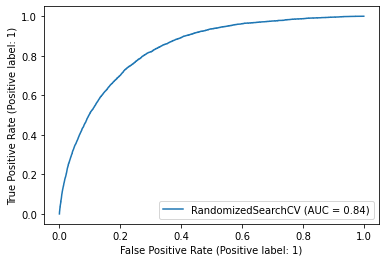

In [31]:
plot_roc_curve(rf_rscv, X_test, y_test)

In [34]:
print(confusion_matrix(y_test, y_preds))

[[58200   192]
 [ 5301   266]]


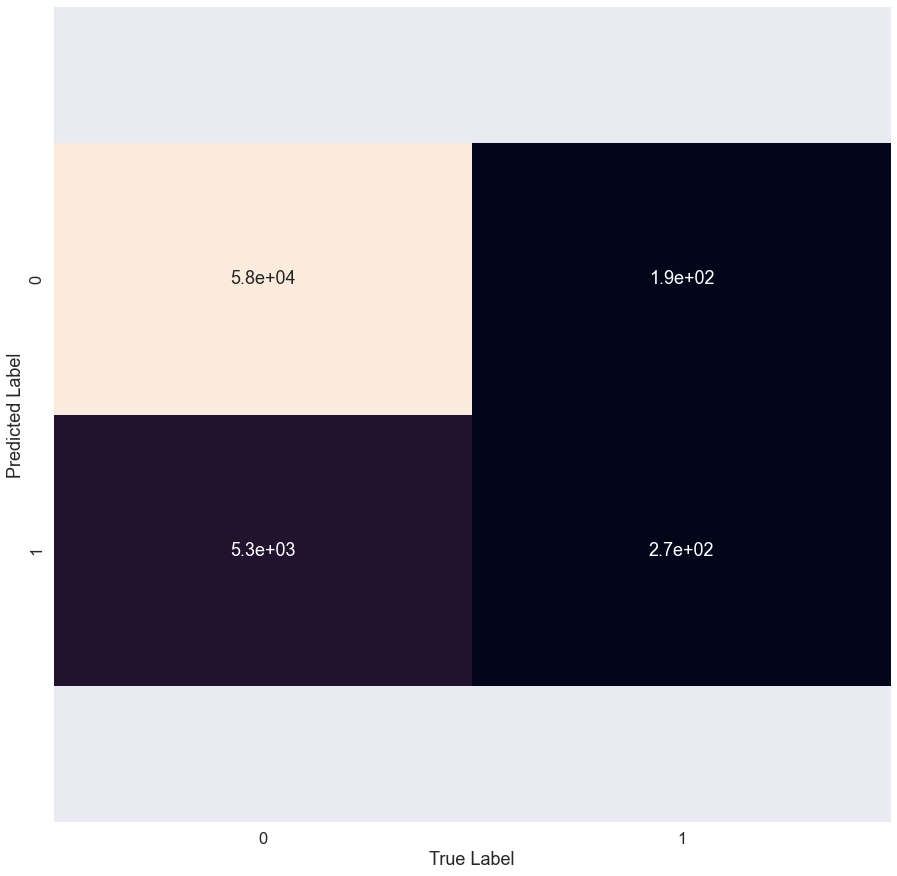

In [39]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize = (15,15))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, y_preds)

## results of the confusion matrix
* 58000 true negative
* 5300  false positivem
* 190 false negative
* 270 true positive

In [69]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.92      1.00      0.95     58392
           1       0.58      0.05      0.09      5567

    accuracy                           0.91     63959
   macro avg       0.75      0.52      0.52     63959
weighted avg       0.89      0.91      0.88     63959



## The above model is struggling with the minority class. going to try with balanced class_weight

In [70]:
test_model = RandomForestClassifier(class_weight= 'balanced')

In [66]:
test_model.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced_subsample')

In [67]:
test_model.score(X_test, y_test)

0.9010459825825919

In [68]:
test_ypreds=test_model.predict(X_test)

In [60]:
print(classification_report(y_test, test_ypreds))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     58392
           1       0.31      0.11      0.17      5567

    accuracy                           0.90     63959
   macro avg       0.62      0.54      0.56     63959
weighted avg       0.87      0.90      0.88     63959



## The above model did a little bit better with recall and f1- score, how ever the precision got worse.

### Trying with a smaller sample of the data to keep the classes balanced

In [71]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,55-59,White,Yes,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,80 or older,White,No,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,65-69,White,Yes,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,75-79,White,No,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,40-44,White,No,1,Very good,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,60-64,Hispanic,Yes,0,Fair,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,35-39,Hispanic,No,1,Very good,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,45-49,Hispanic,No,1,Good,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,25-29,Hispanic,No,0,Good,12.0,0,0,0


## get ~50,000  samples with ~25,000 of each class

In [80]:
heart_Disease = df[df['HeartDisease'] == 1]  #27373

all_no_heart_Disease = df[df['HeartDisease'] == 0] # all data with no heartdisease

all_no_heart_Disease = shuffle(all_no_heart_Disease) # shuffel all of the no heart disease data to help avoid bias


no_heart_Disease = all_no_heart_Disease.head(n=27373) # 27373 with no heart disease to create balanced data set

In [86]:
subset_df = heart_Disease.append(no_heart_Disease, ignore_index=True)  # combine the 2 datasets 

C:\Users\josep\AppData\Local\Temp\ipykernel_21608\330243335.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subset_df = heart_Disease.append(no_heart_Disease, ignore_index=True)


In [88]:
subset_df = shuffle(subset_df) # shuffel the dataset 

In [89]:
subset_df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
12212,1,30.11,1,0,0,5.0,0.0,0,1,80 or older,White,No,1,Fair,7.0,0,0,1
5669,1,46.96,0,0,0,0.0,2.0,0,1,45-49,Other,"No, borderline diabetes",1,Fair,6.0,1,0,0
39945,0,21.54,0,0,0,0.0,0.0,0,0,65-69,White,No,1,Very good,6.0,0,0,1
37866,0,30.27,0,0,0,14.0,3.0,0,1,45-49,White,No,1,Fair,8.0,0,0,0
44412,0,29.62,0,0,0,0.0,0.0,0,0,55-59,Black,"No, borderline diabetes",1,Very good,6.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30596,0,22.89,0,1,0,0.0,4.0,0,1,18-24,Hispanic,No,1,Very good,7.0,0,0,0
19925,1,29.56,1,0,0,0.0,0.0,0,1,80 or older,White,No,1,Very good,7.0,0,0,0
12762,1,19.80,1,0,0,0.0,0.0,0,1,80 or older,White,Yes,1,Poor,8.0,0,0,0
8059,1,24.27,1,0,0,0.0,0.0,0,1,70-74,White,No,1,Good,6.0,0,0,1


In [109]:
#convert categorical data to numbers

bX = subset_df.drop('HeartDisease', axis =1)
by = subset_df['HeartDisease']

brcat= ['AgeCategory', 'Race', 'GenHealth', 'Diabetic']

b_one_hot = OneHotEncoder()
btransformer = ColumnTransformer([("one_hot",
                                b_one_hot,
                                brcat)],
                               remainder = "passthrough")

btransformed_X = btransformer.fit_transform(bX)



In [110]:
# Create instance of model for the balanced data set
bss_rfc_model = RandomForestClassifier()

In [111]:
# split the data
bX_train, bX_test, by_train, by_test = train_test_split(btransformed_X,by, test_size=.2)

In [112]:
by_train.describe()

count    43796.000000
mean         0.498699
std          0.500004
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: HeartDisease, dtype: float64

In [113]:
#Check Base Model
bss_rfc_model = RandomForestClassifier().fit(bX_train,by_train)





In [114]:
bss_rfc_model.score(bX_test,by_test) # Score base model

0.7442922374429224

In [115]:
bypreds=bss_rfc_model.predict(bX_test)

In [116]:
print(classification_report(by_test, bypreds))

              precision    recall  f1-score   support

           0       0.76      0.71      0.73      5418
           1       0.73      0.78      0.75      5532

    accuracy                           0.74     10950
   macro avg       0.75      0.74      0.74     10950
weighted avg       0.75      0.74      0.74     10950



In [118]:
# Create a parameter grid for random search  and fit the model

b_paramGrid = {"n_estimators" : np.arange(10, 200, 40),
            "max_features" : ["auto", "sqrt", "log2", None],
            "max_depth" : [None, 3, 5 , 10],
            "min_samples_split" : np.arange(2,20,2),
            "min_samples_leaf" : np.arange(2,20,2)}

brf_rscv = RandomizedSearchCV(RandomForestClassifier(),
                            param_distributions=paramGrid,
                            cv=5,
                            n_iter=20,
                            verbose = True)

brf_rscv.fit(bX_train,by_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  50,  90, 130, 170])},
                   verbose=True)

In [119]:
brf_rscv.best_estimator_

RandomForestClassifier(max_features='log2', min_samples_leaf=10,
                       min_samples_split=10, n_estimators=50)

In [121]:
brf_rscv.best_score_ #score the best parameters

0.762649475738197

# Save the best model

### I'm Going to save the model of the complete data set because False negatives seem like the most detramental result for this project and the tuned no balance weight model did the best at limiting those.

In [151]:
#create the model for export based on the best returned parameters from rscv and refit
e_model = RandomForestClassifier(n_estimators= 110, min_samples_split=12,min_samples_leaf=6,max_features='auto',max_depth= None)

e_model.fit(X_train,y_train)



RandomForestClassifier(min_samples_leaf=6, min_samples_split=12,
                       n_estimators=110)

In [152]:
#double check the score before export
e_model.score(X_test,y_test)

0.9168686189590206

In [156]:
pickle.dump(e_model,open("Models/model.pkl","wb"))